1.Can you think of a few applications for a sequence-to-sequence RNN?

In Sequence to Sequence Learning, RNN is trained to map an input sequence to an output sequence which is not necessarily of the same length. Applications are speech recognition, machine translation, image captioning and question answering.

Predicting the weather, or any other time series, machine translation, video captioning, speech to text, music generation, identifying the chords of a song.

What about a sequence-to-vector RNN, and a vector-to-sequence RNN?

Few applications of a sequence-to-vector RNN:

Classifying music samples by music genre, analyzing the sentiment of a book review, predicting what word an aphasic patient is thinking of based on readings from brain implants, predicting the probability that a user will want to watch a movie based on their watch history.

Few applications of a vector-to-sequence RNN:

Image captioning, a music playlist based on an embedding of the current artist, generating a melody based on a set of parameters, locating pedestrians in a picture.

2.How many dimensions must the inputs of an RNN layer have? What does each dimension
represent? What about its outputs?

The RNN input needs to have 3 dimensions. Typically it would be batch size, the number of time  steps and third holds the inputs at each time step.

For eample, if we want to process a batch containg 5 time series of 10 time steps each with 2 values per time step, the shape will be [5, 10, 2]). The same is true of its outputs, but the last dimension is equal to the number of neurons.

3.If you want to build a deep sequence-to-sequence RNN, which RNN layers should
have return_sequences=True?

If we want to build a deep sequence-to-sequence RNN, all RNN layers should
have return_sequences=True.

What about a sequence-to-vector RNN?

All layers except the top layer should have return_sequences = True, the top layer which should have return_sequences=False.

4.Suppose you have a daily univariate time series, and you want to forecast the next seven
days. Which RNN architecture should you use?

A stack of RNNs with return_sequences=True at every layer except the top. We can then have seven neurons in the output.

5.What are the main difficulties when training RNNs? How can you handle them?

The main difficulties when training RNNs are Unstable gradients and limited short-term memory.

To handle the gradients, we should use a slower learning rate and a saturating activation function like hyperbolic tangent with gradient clipping. To solve the memory, we should use LSTM or GRU Layers.

6.Can you sketch the LSTM cell’s architecture?

LSTM networks are an extension of recurrent neural networks (RNNs) mainly introduced to handle situations where RNNs fail.
The basic difference between the architectures of RNNs and LSTMs is that the hidden layer of LSTM is a gated unit or gated cell. It consists of four layers that interact with one another in a way to produce the output of that cell along with the cell state. These two things are then passed onto the next hidden layer. Unlike RNNs which have got the only single neural net layer of tanh, LSTMs comprises of three logistic sigmoid gates and one tanh layer. Gates have been introduced in order to limit the information that is passed through the cell. They determine which part of the information will be needed by the next cell and which part is to be discarded. The output is usually in the range of 0-1 where ‘0’ means ‘reject all’ and '1' means 'include all'.  

7.Why would you want to use 1D convolutional layers in an RNN?

It is good for parallelization. Also, since not recurrent, it suffers less from exploding or vanishing gradients.

8.Which neural network architecture could you use to classify videos?

We could use one frame per second for the RNN input, or a Sequence-to-vector model.

9.Train a classification model for the SketchRNN dataset, available in TensorFlow Datasets.

In [5]:
import numpy as np 
import pandas as pd 
from tensorflow import keras
import tensorflow as tf

In [6]:
# Download the data
download_root = "http://download.tensorflow.org/data/"
filename = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(filename,
                               download_root + filename,
                               cache_subdir="datasets/quickdraw",
                               extract=True)

In [7]:
# split the data into train files and test files
from pathlib import Path

quickdraw_dir = Path(filepath).parent
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [8]:
train_files

['C:\\Users\\USER\\.keras\\datasets\\quickdraw\\training.tfrecord-00000-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\training.tfrecord-00001-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\training.tfrecord-00002-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\training.tfrecord-00003-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\training.tfrecord-00004-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\training.tfrecord-00005-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\training.tfrecord-00006-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\training.tfrecord-00007-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\training.tfrecord-00008-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\training.tfrecord-00009-of-00010']

In [9]:
eval_files

['C:\\Users\\USER\\.keras\\datasets\\quickdraw\\eval.tfrecord-00000-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\eval.tfrecord-00001-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\eval.tfrecord-00002-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\eval.tfrecord-00003-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\eval.tfrecord-00004-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\eval.tfrecord-00005-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\eval.tfrecord-00006-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\eval.tfrecord-00007-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\eval.tfrecord-00008-of-00010',
 'C:\\Users\\USER\\.keras\\datasets\\quickdraw\\eval.tfrecord-00009-of-00010']

In [10]:
# Open the classes from train and test dataset

with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()

with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()

In [11]:
# get all the class name 
assert train_classes == test_classes
class_names = [name.strip().lower() for name in train_classes]

In [12]:
sorted(class_names)

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

In [13]:
# Create a function to parse the data in batches
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths , labels

In [14]:
# Create a function to convert the data into train,valid and test set from dataset
def quickdraw_dataset(filepaths , batch_size = 32 , shuffle_buffer_size = None,
                     n_parse_threads = 5 , n_read_threads = 5, cache = False):
    dataset = tf.data.TFRecordDataset(filepaths,
                                     num_parallel_reads = n_parse_threads)
    if cache:
        dataset = dataset.cache()
        
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse , num_parallel_calls = n_parse_threads)
    return dataset.prefetch(1)

In [15]:
train_set = quickdraw_dataset(train_files , shuffle_buffer_size = 10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [16]:
# iterate only 1 batch
for sketches , lengths , labels in train_set.take(1):
    print("sketches =", sketches)
    print("lengths =", lengths)
    print("labels =", labels)

sketches = tf.Tensor(
[[[-0.01176471  0.1391753   0.        ]
  [-0.01960784  0.02061856  0.        ]
  [-0.00784314  0.26288658  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.09803921  0.          0.        ]
  [-0.21568626 -0.08720928  0.        ]
  [-0.3647059  -0.09302324  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.02352941  0.17372882  0.        ]
  [ 0.          0.2542373   0.        ]
  [-0.02352941  0.16525424  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.05109488 -0.28235292  0.        ]
  [-0.0729927  -0.22352943  0.        ]
  [-0.02189781 -0.43137255  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.    

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a function to draw a particular sketch
def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

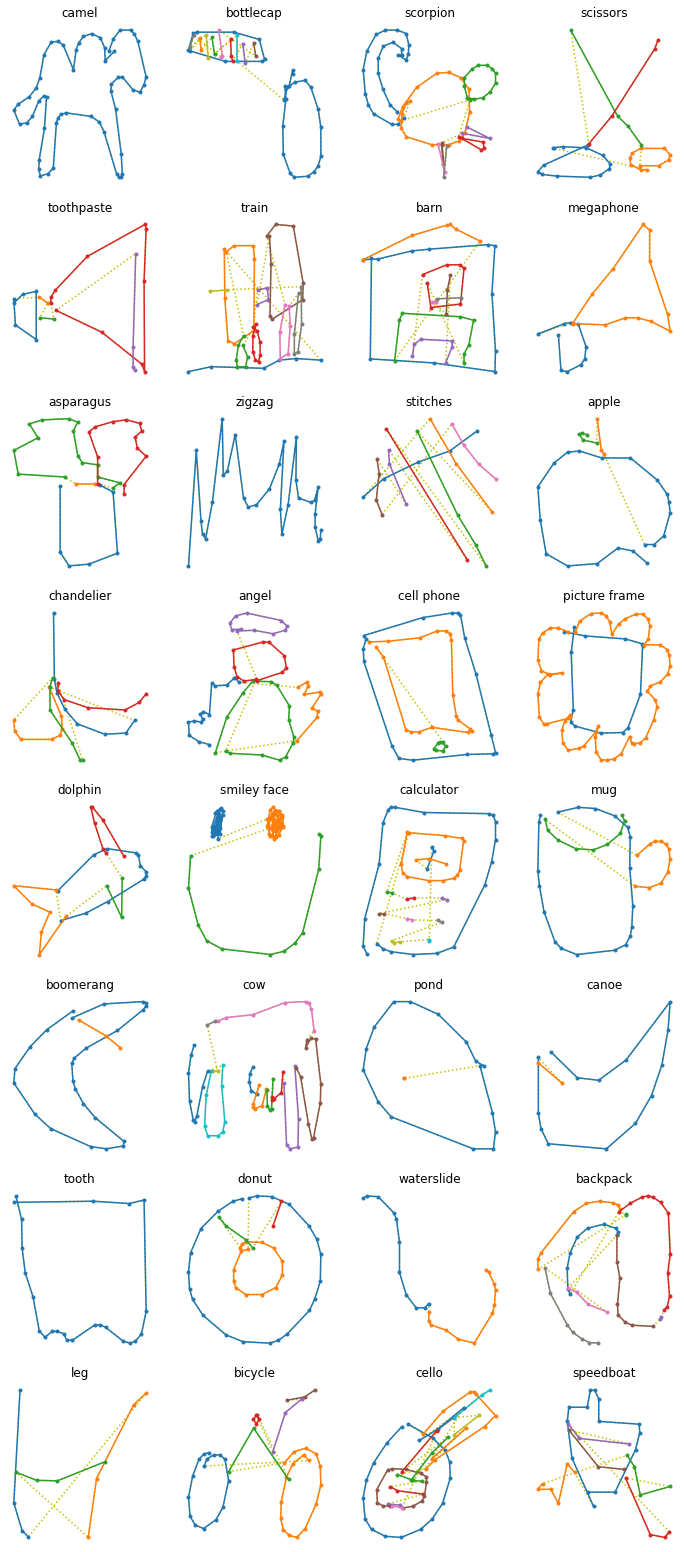

In [19]:
# Create a function to draw a sketches and print their labels
def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch[:length], label)
    plt.show()

for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)

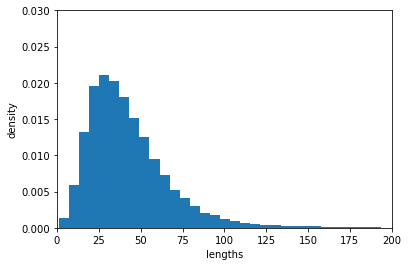

In [20]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths , bins = 150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("lengths")
plt.ylabel("density")
plt.show()